# Iterative Volume-of-Fluid interface positioning in general polyhedrons with Consecutive Cubic Spline interpolation

### Data 

**Endo-dodecahedron images**: http://dx.doi.org/10.25534/tudatalib-63

### Source code

**Git Repository:** https://git.rwth-aachen.de/leia/geophase

**Git Tag:** JCOMP-D-19-01329R2

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

### IMPORTANT: set DATA_DIR to the relative path with respect to this notebook, that contains output data

***build-timing*** is the default option 

In [2]:
%matplotlib inline
from plot_positioning import *
import seaborn as sns

DATA_DIR="../timing-data" # !!! Path to the directory with test output. 
TEST_TYPE="CONVERGENCE" 
figPathName = os.curdir 
if "GEOP" in os.environ:
    figPathName = os.path.join(os.environ["GEOP"], "figures") 

In [3]:
from matplotlib import offsetbox
from matplotlib import pyplot as plt
from matplotlib import rcParams
import pandas as pd
import urllib.request
import tarfile

rcParams["figure.dpi"] = 200
rcParams["figure.figsize"] = 4.5,3.5
rcParams['font.size'] = 11
rcParams["xtick.labelsize"] = 11
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

### Average number of iterations and CPU times for different polyhedrons (cells)

#### Computing architecture

**CPU**

vendor id : AuthenticAMD, cpu family : 23, model : 24, model name : AMD Ryzen 7 PRO 3700U w/ Radeon Vega Mobile Gfx

Output from ”cpupower frequency-info”: ”[CPU] Frequency should be within 2.30 GHz and 2.30 GHz.
The governor ”performance” may decide which speed to use within this range.”

**Compiler**

version : g++ 9.3.0-1, optimization flags : -std=c++2a -O3

Saving fig


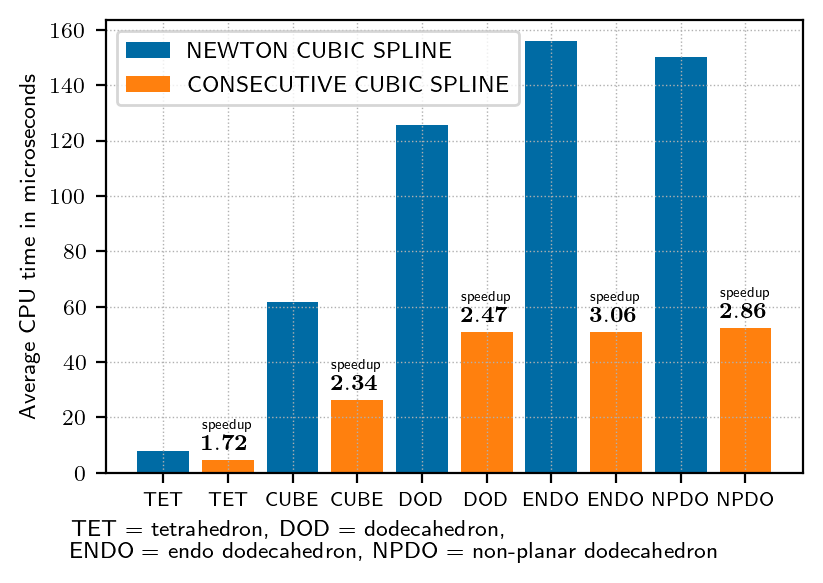

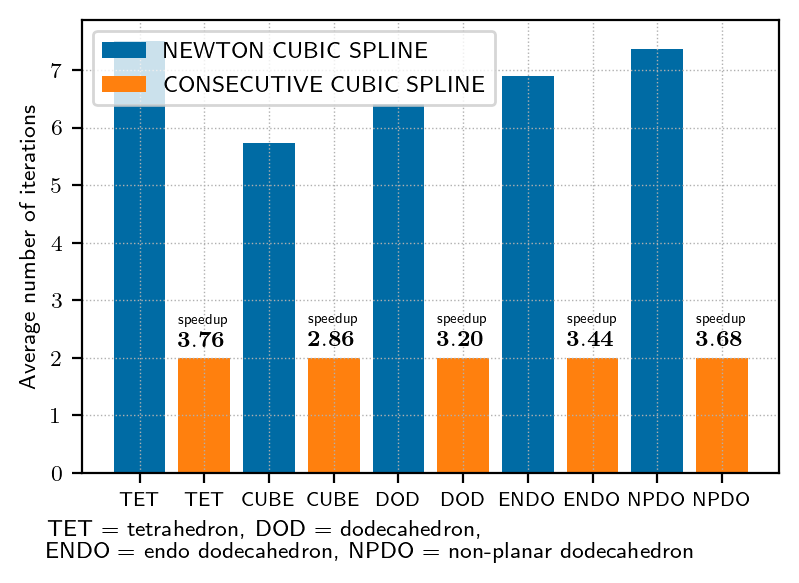

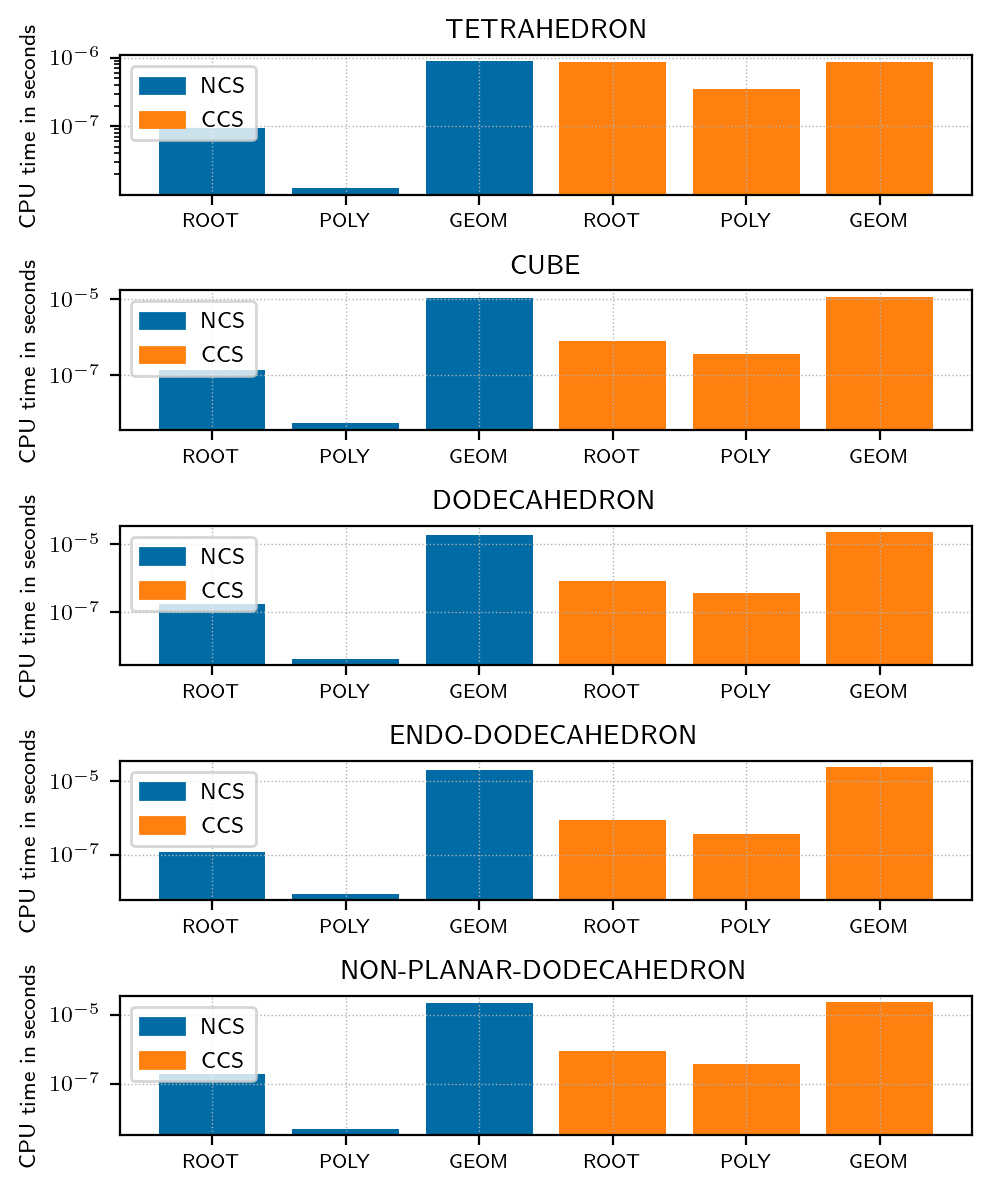

In [4]:
dataFileName = "%s/%s_TEST_POSITIONING_TOTAL_DATA.csv" % (DATA_DIR, TEST_TYPE)
totalData = pd.read_csv(dataFileName, comment='#') 
plot_total_data(totalData)

# 1 Tetrahedron 

## 1.1 Tetrahedron: Newton Cubic Spline Method

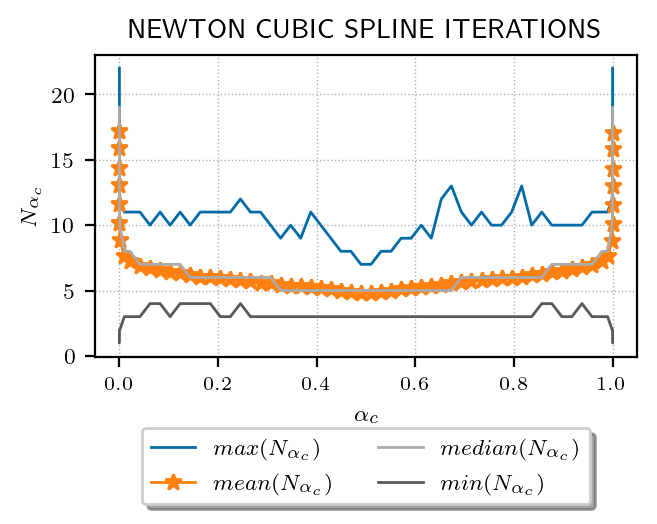

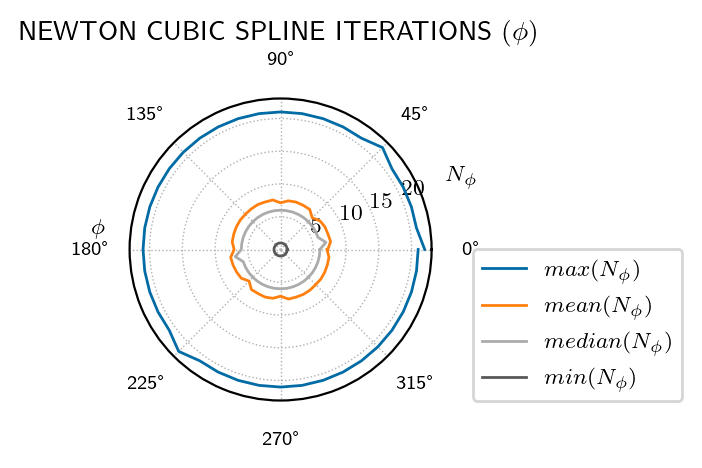

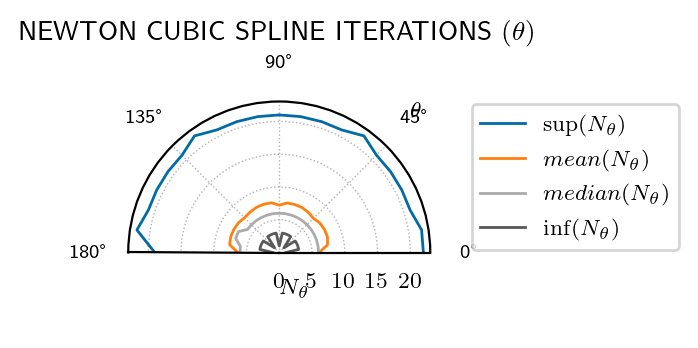

In [5]:
testName = "%s_TEST_POSITIONING.TETRAHEDRON_NEWTON_CUBIC_SPLINE" % TEST_TYPE
newtonDataTetrahedron = pd.read_csv("%s/%s" % (DATA_DIR, testName + ".csv"), comment='#', index_col=[0,1,2])
plot_iterations(newtonDataTetrahedron, testName, "NEWTON CUBIC SPLINE")

## 1.2 Tetrahedron: Consecutive Cubic Spline 

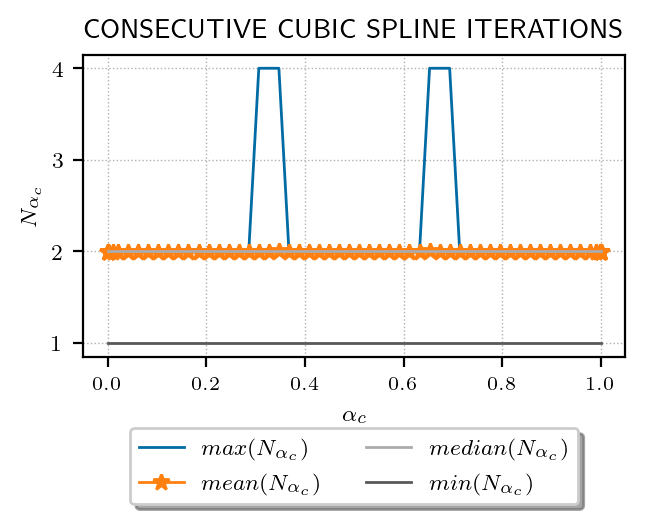

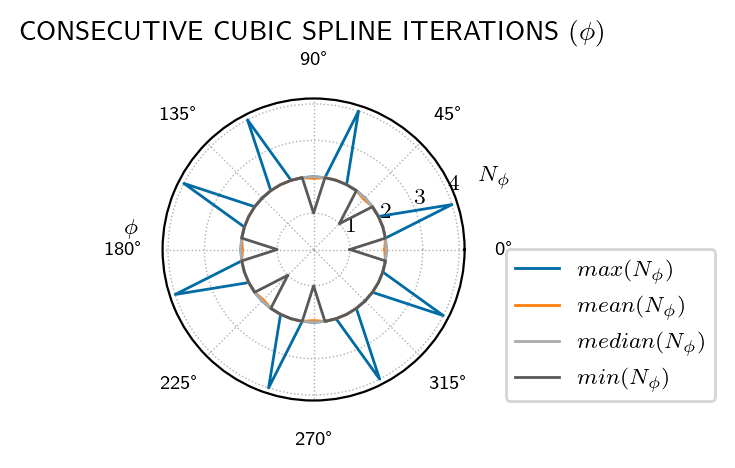

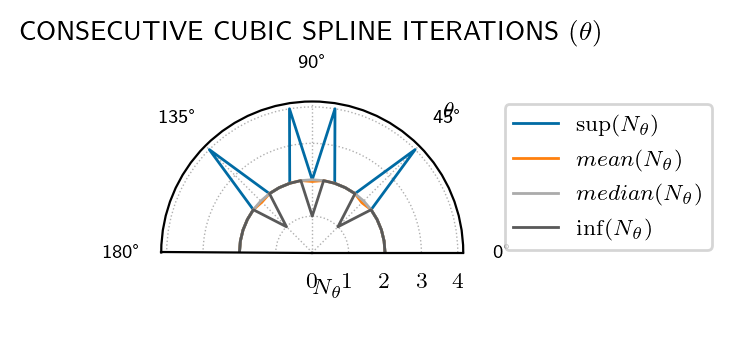

In [6]:
testName = "%s_TEST_POSITIONING.TETRAHEDRON_CONSECUTIVE_CUBIC_SPLINE" % TEST_TYPE
cubicDataTetrahedron = pd.read_csv("%s/%s.csv" % (DATA_DIR, testName), comment='#', index_col=[0,1,2])
plot_iterations(cubicDataTetrahedron, testName, "CONSECUTIVE CUBIC SPLINE")

## 1.3 Tetrahedron: Method comparison 
**Iterations**

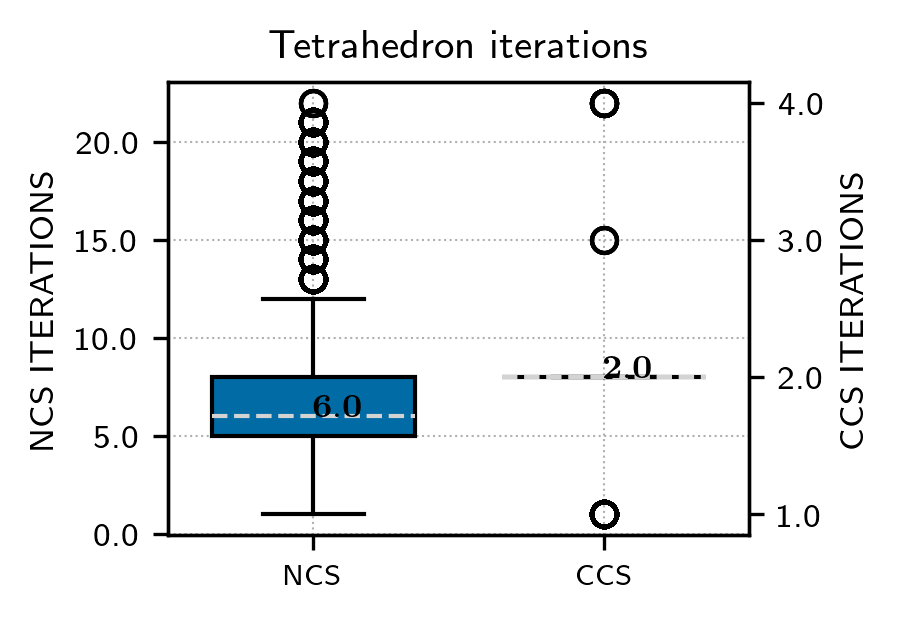

In [7]:
plot_iteration_boxplots(cubicDataTetrahedron, newtonDataTetrahedron, 'Tetrahedron')
plt.grid(False)

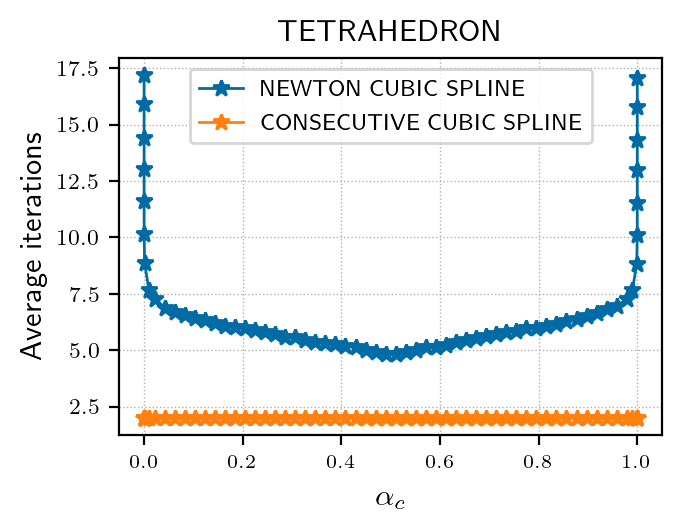

In [8]:
set_iteration_fig_properties()
newtonAlphaItMean = newtonDataTetrahedron.groupby('ALPHA_STAR').ITERATIONS.mean()
cubicAlphaItMean = cubicDataTetrahedron.groupby('ALPHA_STAR').ITERATIONS.mean()
plt.plot(newtonAlphaItMean.index, newtonAlphaItMean, marker='*', label="NEWTON CUBIC SPLINE")
plt.plot(cubicAlphaItMean.index, cubicAlphaItMean, marker='*', label="CONSECUTIVE CUBIC SPLINE")
plt.xlabel(r"$\alpha_c$", fontsize=11)
plt.title("TETRAHEDRON",fontsize=11)
plt.ylabel("Average iterations",fontsize=11)
plt.legend()
plt.savefig(os.path.join(figPathName,"COMPARISON_NCS_CCS_TETRAHEDRON_ITERATIONS.pdf"),
            bbox_inches='tight')

**CPU Time** 

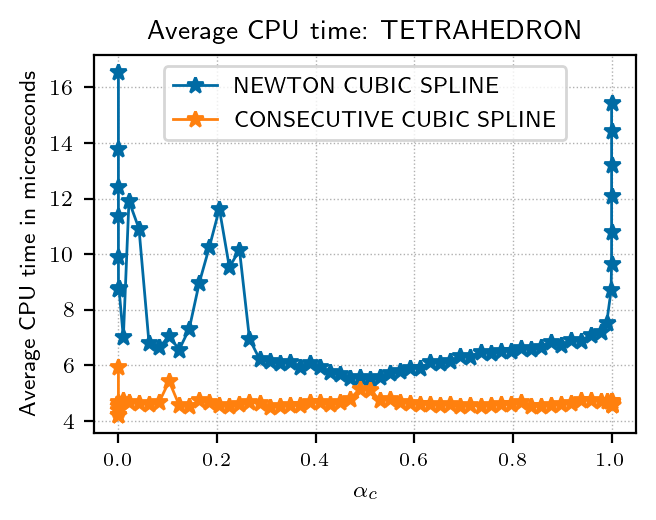

In [9]:
newtonCpuTimeAlphaMean = newtonDataTetrahedron.groupby('ALPHA_STAR').CPU_TIME_NANOSECONDS.mean() / 1000.
cubicCpuTimeAlphaMean = cubicDataTetrahedron.groupby('ALPHA_STAR').CPU_TIME_NANOSECONDS.mean() / 1000.
plt.plot(newtonCpuTimeAlphaMean.index, newtonCpuTimeAlphaMean, marker="*", label="NEWTON CUBIC SPLINE")
plt.plot(cubicCpuTimeAlphaMean.index, cubicCpuTimeAlphaMean, marker="*", label="CONSECUTIVE CUBIC SPLINE")
plt.xlabel(r"$\alpha_c$")
plt.title("Average CPU time: TETRAHEDRON")
plt.ylabel("Average CPU time in microseconds")
plt.legend()
plt.savefig(os.path.join(figPathName,"COMPARISON_NCS_CCS_TETRAHEDRON_CPU_TIME.pdf"),
            bbox_inches='tight')

# 2 Cube 

## 2.1 Cube: Newton Cubic Spline Method

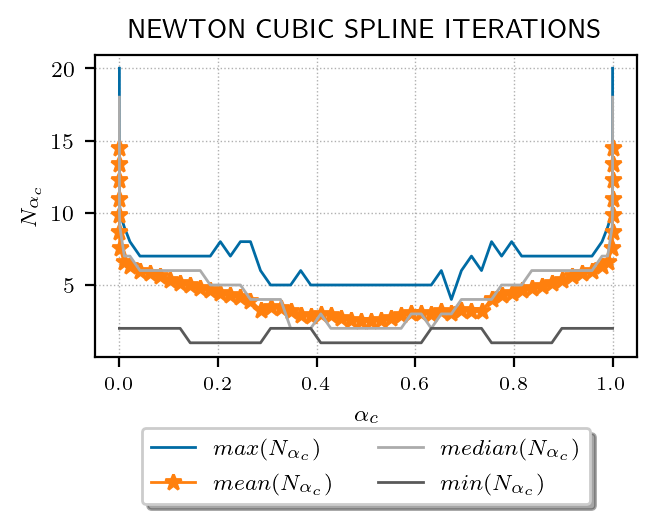

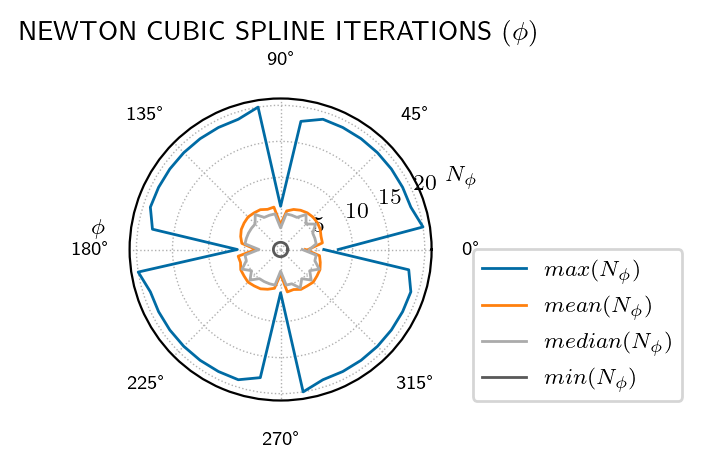

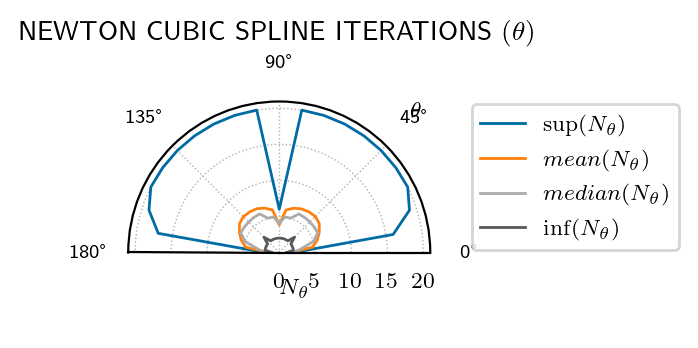

In [10]:
testName = "%s_TEST_POSITIONING.CUBE_NEWTON_CUBIC_SPLINE" % TEST_TYPE
newtonDataCube = pd.read_csv("%s/%s.csv" % (DATA_DIR, testName), comment='#', index_col=[0,1,2])
plot_iterations(newtonDataCube, testName, "NEWTON CUBIC SPLINE")

## 2.2 Cube: Consecutive Cubic Spline 

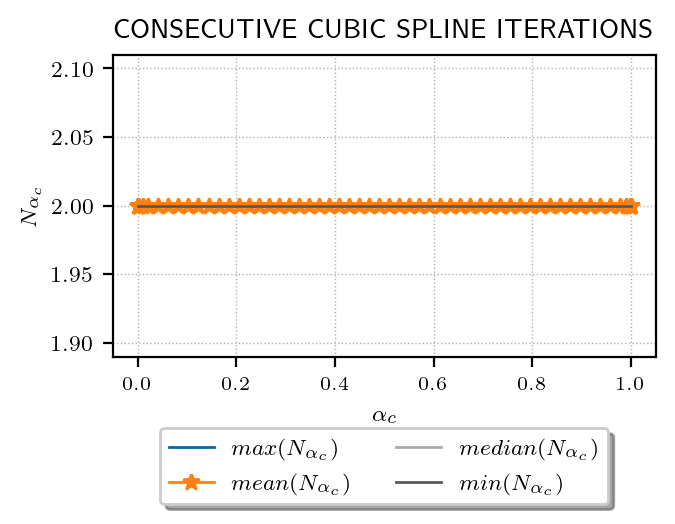

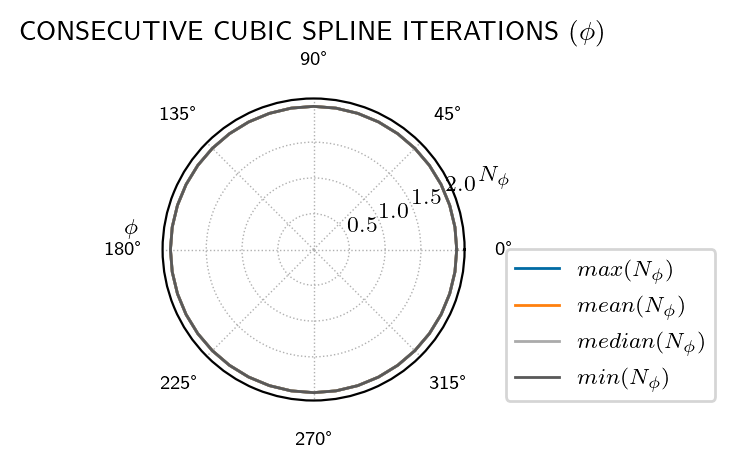

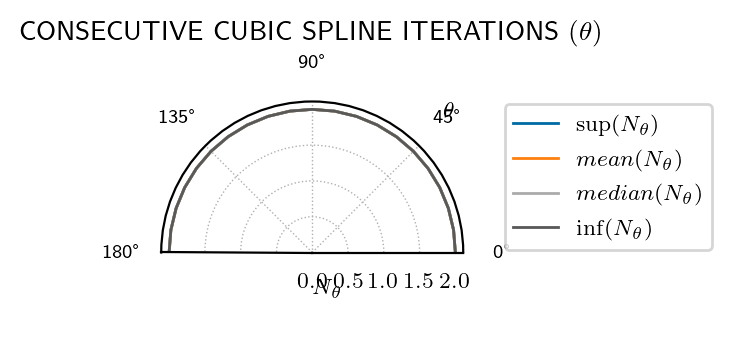

In [11]:
testName = "%s_TEST_POSITIONING.CUBE_CONSECUTIVE_CUBIC_SPLINE" % TEST_TYPE
cubicDataCube = pd.read_csv("%s/%s.csv" % (DATA_DIR, testName), comment='#', index_col=[0,1,2])
plot_iterations(cubicDataCube, testName, "CONSECUTIVE CUBIC SPLINE")

## 2.3 Cube: Method comparison 
**Iterations**

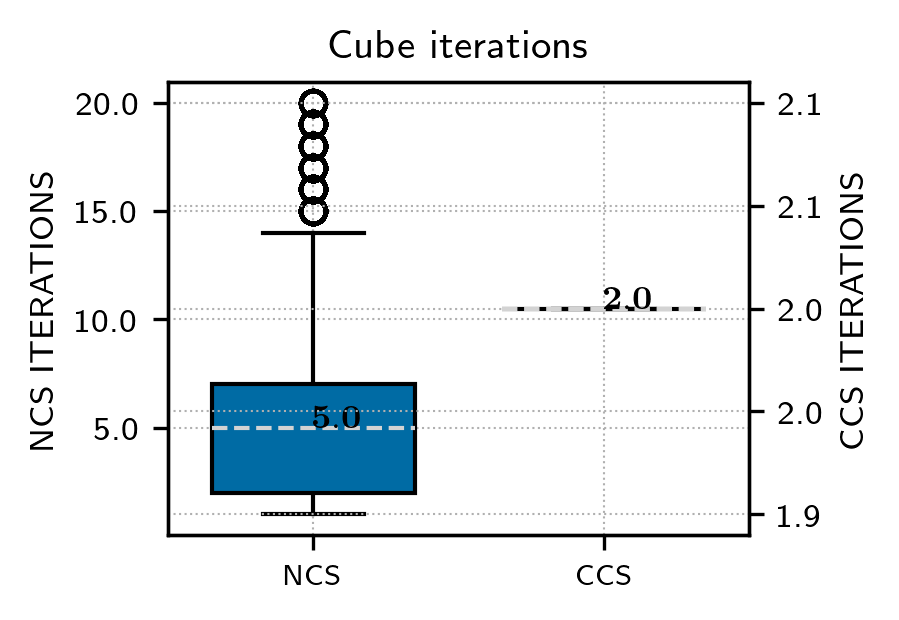

In [12]:
plot_iteration_boxplots(cubicDataCube, newtonDataCube, 'Cube')

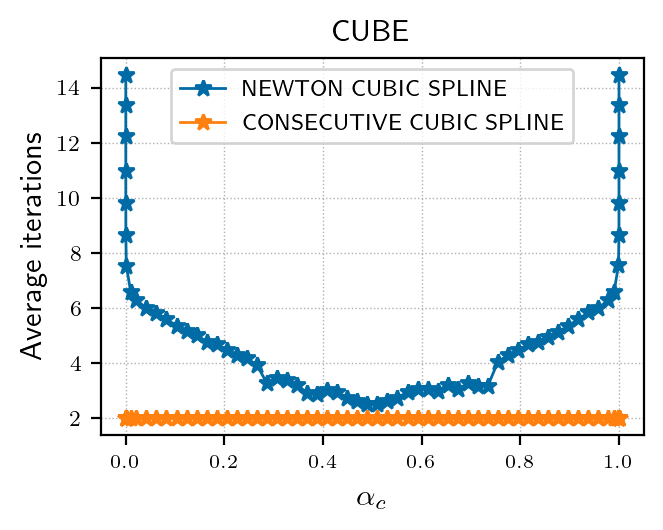

In [13]:
set_iteration_fig_properties()
newtonAlphaItMean = newtonDataCube.groupby('ALPHA_STAR').ITERATIONS.mean()
cubicAlphaItMean = cubicDataCube.groupby('ALPHA_STAR').ITERATIONS.mean()
plt.plot(newtonAlphaItMean.index, newtonAlphaItMean, marker='*', label="NEWTON CUBIC SPLINE")
plt.plot(cubicAlphaItMean.index, cubicAlphaItMean, marker='*', label="CONSECUTIVE CUBIC SPLINE")
plt.xlabel(r"$\alpha_c$", fontsize=11)
plt.title("CUBE",fontsize=11)
plt.ylabel("Average iterations",fontsize=11)
plt.legend()
plt.savefig(os.path.join(figPathName,"COMPARISON_NCS_CCS_CUBE_ITERATIONS.pdf"),
            bbox_inches='tight')

**CPU Time** 

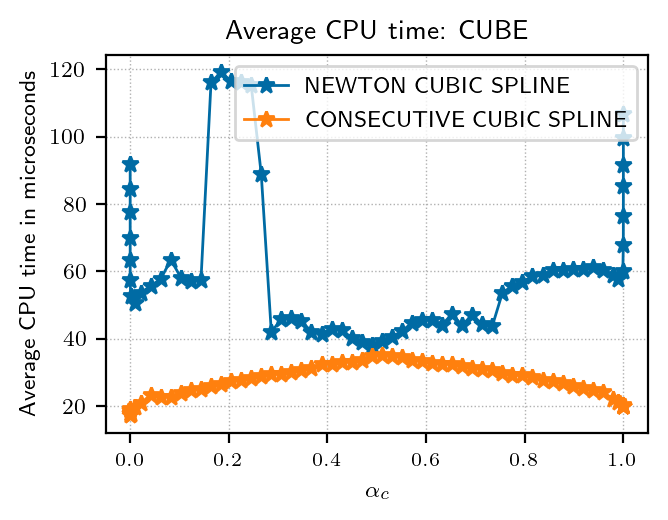

In [14]:
newtonCpuTimeAlphaMean = newtonDataCube.groupby('ALPHA_STAR').CPU_TIME_NANOSECONDS.mean() / 1000.
cubicCpuTimeAlphaMean = cubicDataCube.groupby('ALPHA_STAR').CPU_TIME_NANOSECONDS.mean() / 1000.
plt.plot(newtonCpuTimeAlphaMean.index, newtonCpuTimeAlphaMean, marker="*", label="NEWTON CUBIC SPLINE")
plt.plot(cubicCpuTimeAlphaMean.index, cubicCpuTimeAlphaMean, marker="*", label="CONSECUTIVE CUBIC SPLINE")
plt.xlabel(r"$\alpha_c$")
plt.title("Average CPU time: CUBE ")
plt.ylabel("Average CPU time in microseconds")
plt.legend()
plt.savefig(os.path.join(figPathName,"COMPARISON_NCS_CCS_CUBE_CPU_TIME.pdf"),
            bbox_inches='tight')

# 3 Docehahedron 

## 3.1 Dodecahedron: Newton Cubic Spline Method

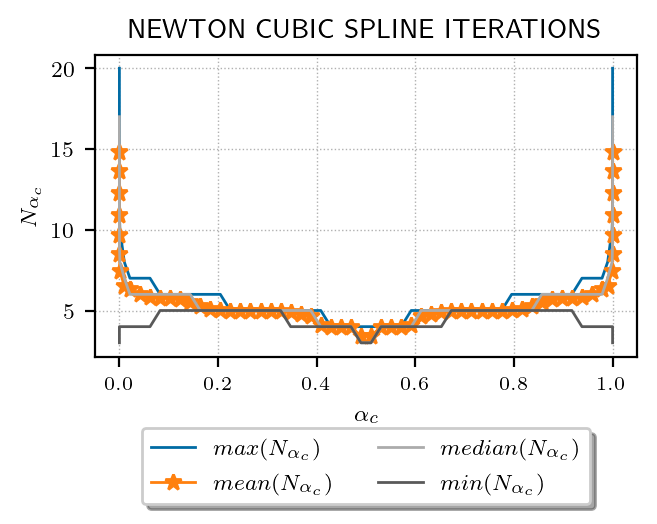

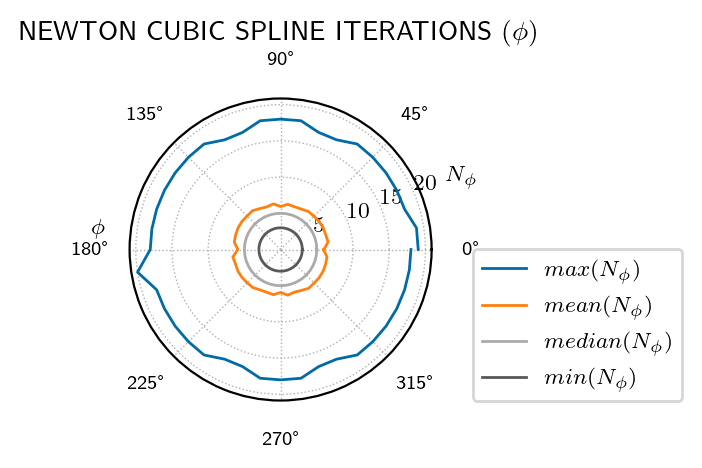

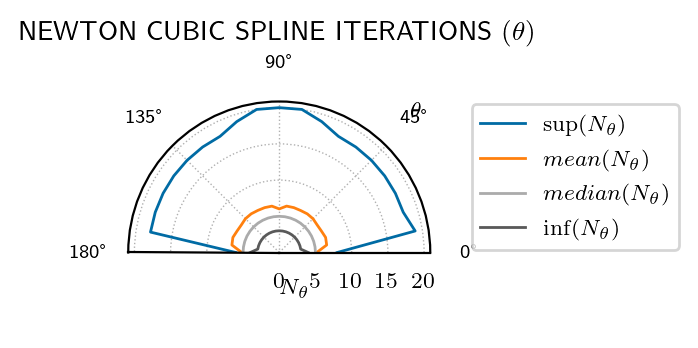

In [15]:
testName = "%s_TEST_POSITIONING.DODECAHEDRON_NEWTON_CUBIC_SPLINE" % TEST_TYPE
newtonDataDodecahedron = pd.read_csv("%s/%s.csv" % (DATA_DIR, testName), comment='#', index_col=[0,1,2])
plot_iterations(newtonDataDodecahedron, testName, "NEWTON CUBIC SPLINE")

## 3.2 Dodecahedron: Consecutive Cubic Spline 

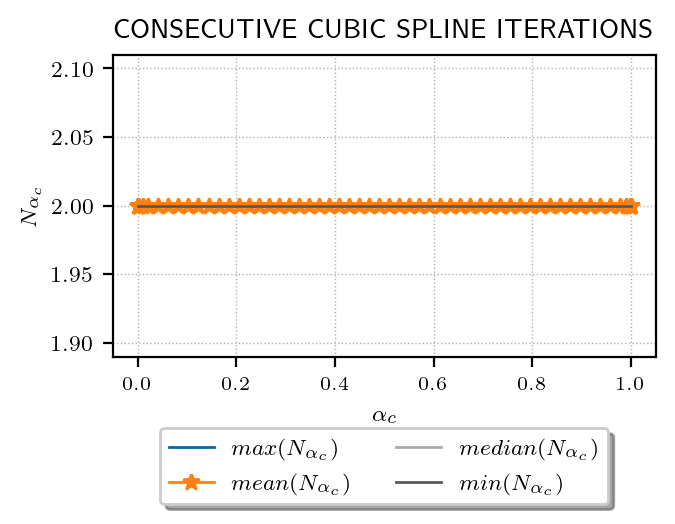

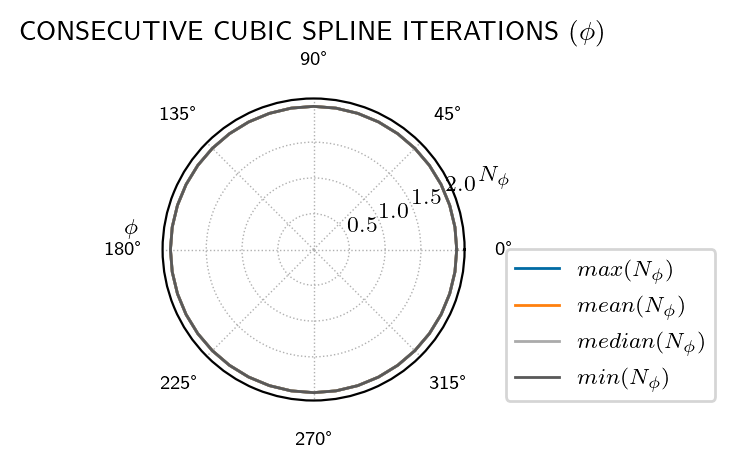

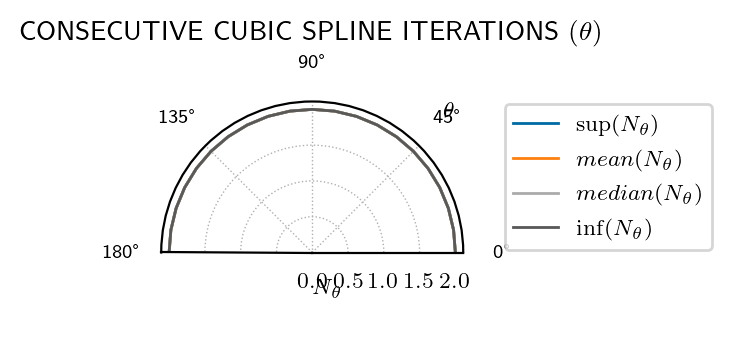

In [16]:
testName = "%s_TEST_POSITIONING.DODECAHEDRON_CONSECUTIVE_CUBIC_SPLINE" % TEST_TYPE
cubicDataDodecahedron = pd.read_csv("%s/%s.csv" % (DATA_DIR, testName), comment='#', index_col=[0,1,2])
plot_iterations(cubicDataDodecahedron, testName, "CONSECUTIVE CUBIC SPLINE")

## 3.3 Dodecahedron: Method comparison 
**Iterations**

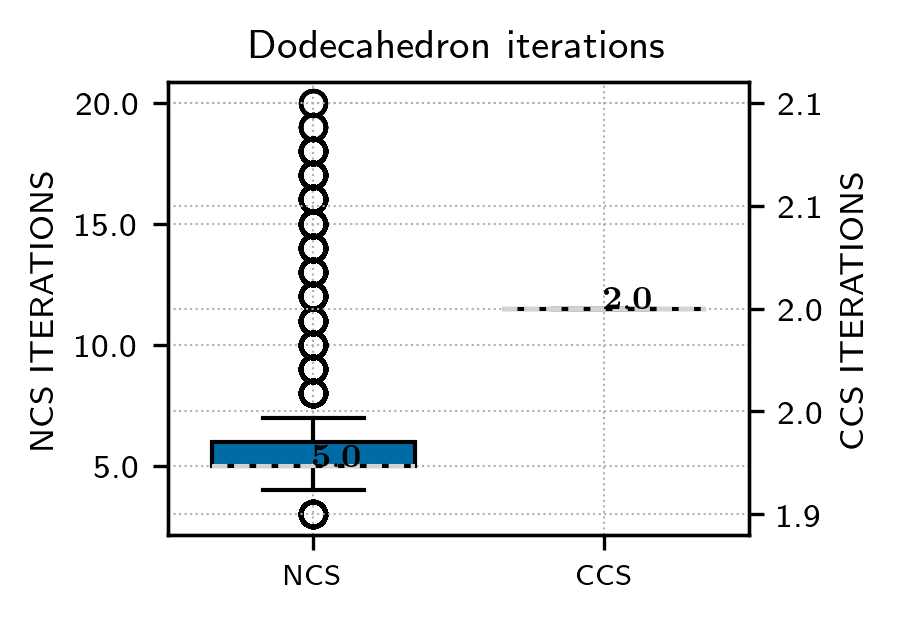

In [17]:
plot_iteration_boxplots(cubicDataDodecahedron, newtonDataDodecahedron, 'Dodecahedron')

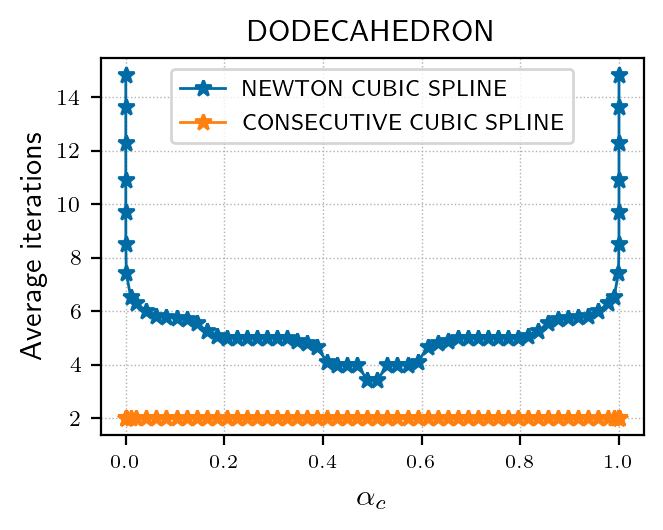

In [18]:
set_iteration_fig_properties()
newtonAlphaItMean = newtonDataDodecahedron.groupby('ALPHA_STAR').ITERATIONS.mean()
cubicAlphaItMean = cubicDataDodecahedron.groupby('ALPHA_STAR').ITERATIONS.mean()
plt.plot(newtonAlphaItMean.index, newtonAlphaItMean, marker='*', label="NEWTON CUBIC SPLINE")
plt.plot(cubicAlphaItMean.index, cubicAlphaItMean, marker='*', label="CONSECUTIVE CUBIC SPLINE")
plt.xlabel(r"$\alpha_c$", fontsize=11)
plt.title("DODECAHEDRON",fontsize=11)
plt.ylabel("Average iterations",fontsize=11)
plt.legend()
plt.savefig(os.path.join(figPathName,"COMPARISON_NCS_CCS_DODECAHEDRON_ITERATIONS.pdf"),
            bbox_inches='tight')

**CPU Time** 

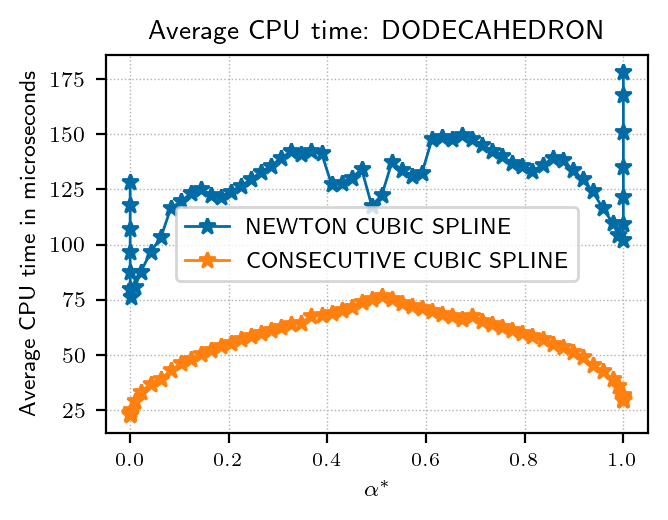

In [19]:
newtonCpuTimeAlphaMean = newtonDataDodecahedron.groupby('ALPHA_STAR').CPU_TIME_NANOSECONDS.mean() / 1000.
cubicCpuTimeAlphaMean = cubicDataDodecahedron.groupby('ALPHA_STAR').CPU_TIME_NANOSECONDS.mean() / 1000.
plt.plot(newtonCpuTimeAlphaMean.index, newtonCpuTimeAlphaMean, marker="*", label="NEWTON CUBIC SPLINE")
plt.plot(cubicCpuTimeAlphaMean.index, cubicCpuTimeAlphaMean, marker="*", label="CONSECUTIVE CUBIC SPLINE")
plt.xlabel(r"$\alpha^*$")
plt.title("Average CPU time: DODECAHEDRON")
plt.ylabel("Average CPU time in microseconds")
plt.legend()
plt.savefig(os.path.join(figPathName,"COMPARISON_NCS_CCS_DODECAHEDRON_CPU_TIME.pdf"),
            bbox_inches='tight')

# 4 Non-planar dodecahedron

## 4.1 Non-planar dodecahedron: Newton Cubic Spline Method

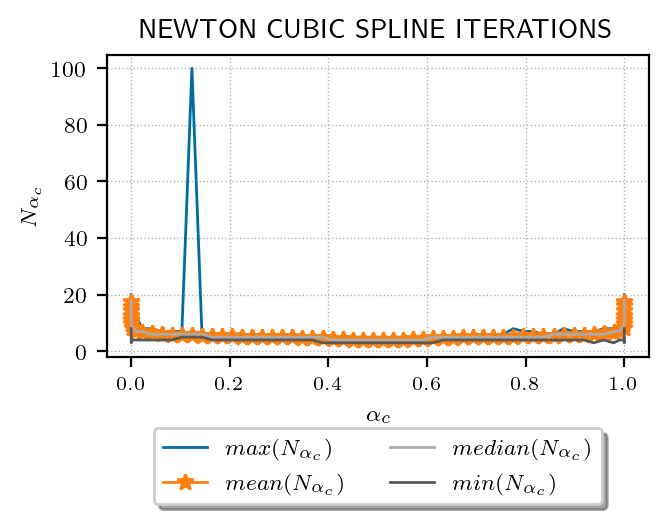

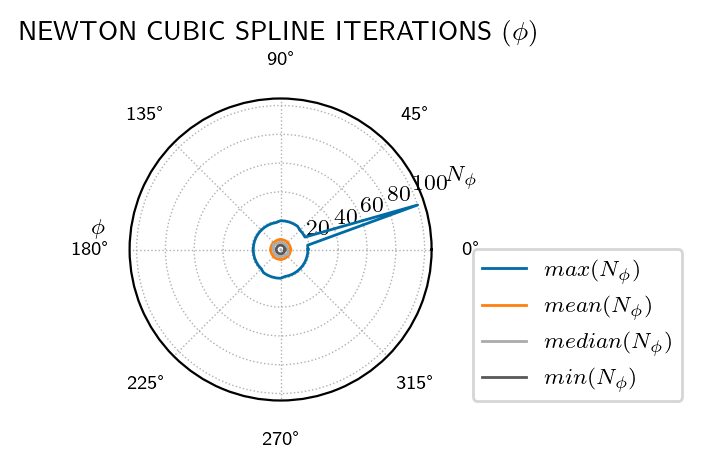

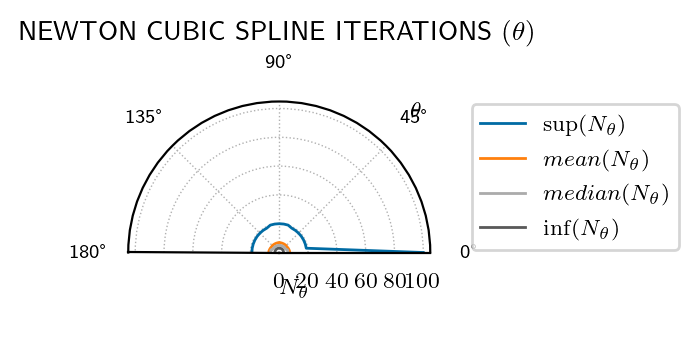

In [20]:
testName = "%s_TEST_POSITIONING.NON_PLANAR_DODECAHEDRON_NEWTON_CUBIC_SPLINE" % TEST_TYPE
newtonDataNplDodecahedron = pd.read_csv("%s/%s.csv" % (DATA_DIR,testName), comment='#', index_col=[0,1,2])
plot_iterations(newtonDataNplDodecahedron, testName, "NEWTON CUBIC SPLINE")

## 4.2 Non-planar dodecahedron: Consecutive Cubic Spline 

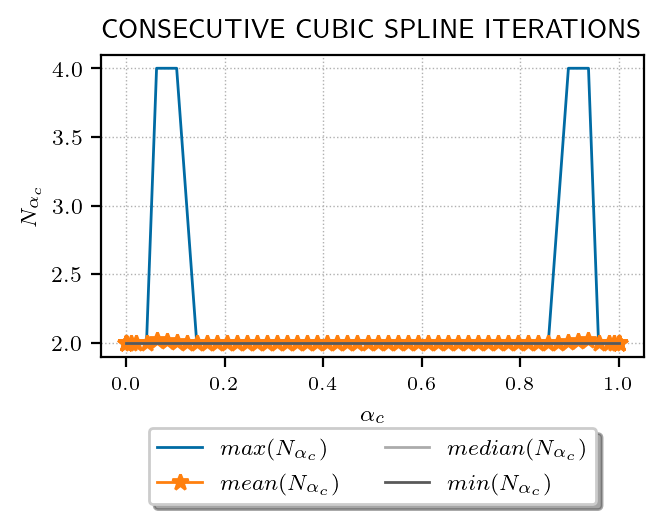

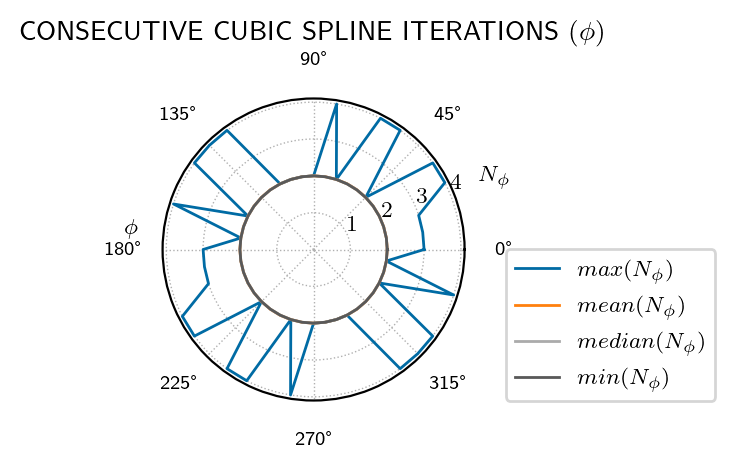

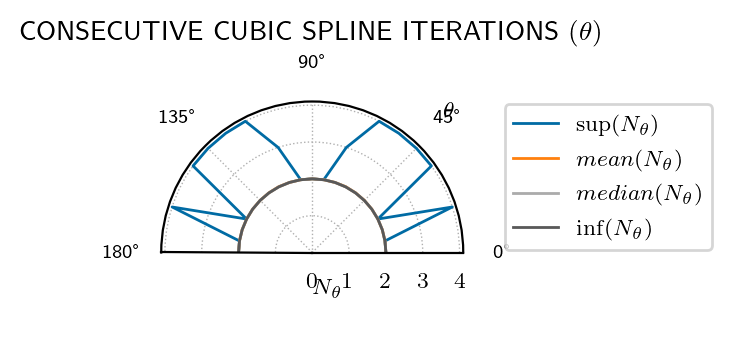

In [21]:
testName = "%s_TEST_POSITIONING.NON_PLANAR_DODECAHEDRON_CONSECUTIVE_CUBIC_SPLINE" % TEST_TYPE
cubicDataNplDodecahedron = pd.read_csv("%s/%s.csv" % (DATA_DIR, testName), comment='#', index_col=[0,1,2])
plot_iterations(cubicDataNplDodecahedron, testName, "CONSECUTIVE CUBIC SPLINE")

## 4.3 Non-planar dodecahedron: Method comparison 
**Iterations**

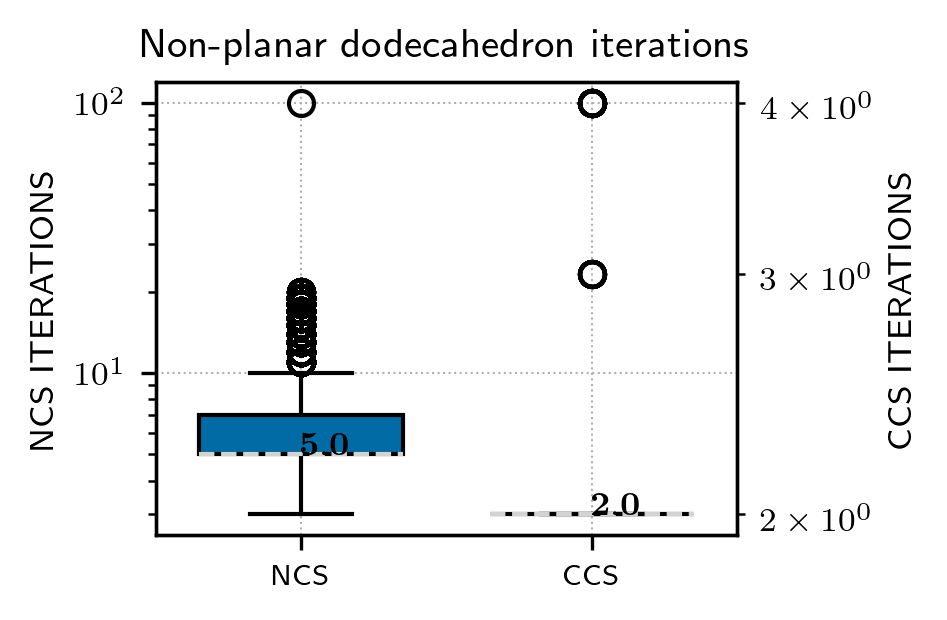

In [22]:
plot_iteration_boxplots(cubicDataNplDodecahedron, newtonDataNplDodecahedron, 'Non-planar dodecahedron')

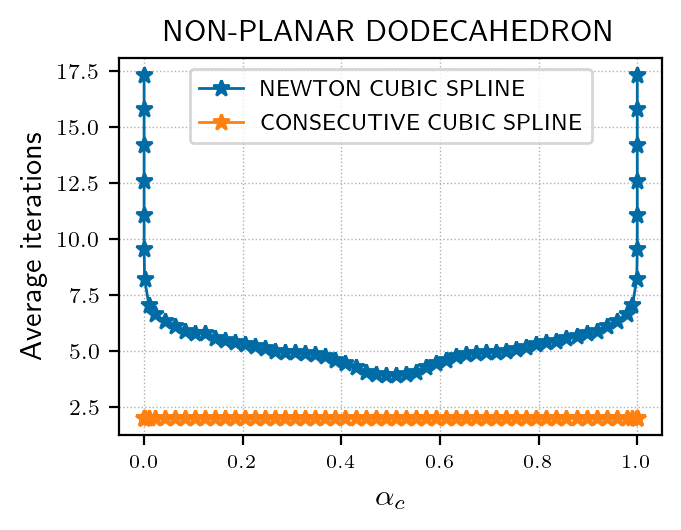

In [23]:
set_iteration_fig_properties()
newtonAlphaItMean = newtonDataNplDodecahedron.groupby('ALPHA_STAR').ITERATIONS.mean()
cubicAlphaItMean = cubicDataNplDodecahedron.groupby('ALPHA_STAR').ITERATIONS.mean()
plt.plot(newtonAlphaItMean.index, newtonAlphaItMean, marker='*', label="NEWTON CUBIC SPLINE")
plt.plot(cubicAlphaItMean.index, cubicAlphaItMean, marker='*', label="CONSECUTIVE CUBIC SPLINE")
plt.xlabel(r"$\alpha_c$", fontsize=11)
plt.title("NON-PLANAR DODECAHEDRON",fontsize=11)
plt.ylabel("Average iterations",fontsize=11)
plt.legend()
plt.savefig(os.path.join(figPathName,"COMPARISON_NCS_CCS_NON_PLANAR_DODECAHEDRON_ITERATIONS.pdf"),
            bbox_inches='tight')

**CPU Time** 

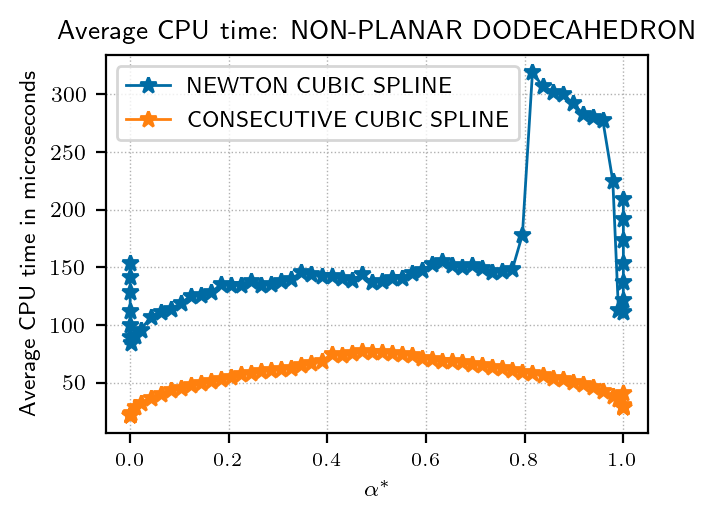

In [24]:
set_iteration_fig_properties()
newtonCpuTimeAlphaMean = newtonDataNplDodecahedron.groupby('ALPHA_STAR').CPU_TIME_NANOSECONDS.mean() / 1000.
cubicCpuTimeAlphaMean = cubicDataNplDodecahedron.groupby('ALPHA_STAR').CPU_TIME_NANOSECONDS.mean() / 1000.
plt.plot(newtonCpuTimeAlphaMean.index, newtonCpuTimeAlphaMean, marker="*", label="NEWTON CUBIC SPLINE")
plt.plot(cubicCpuTimeAlphaMean.index, cubicCpuTimeAlphaMean, marker="*", label="CONSECUTIVE CUBIC SPLINE")
plt.xlabel(r"$\alpha^*$")
plt.title("Average CPU time: NON-PLANAR DODECAHEDRON")
plt.ylabel("Average CPU time in microseconds")
plt.legend()
plt.savefig(os.path.join(figPathName,"COMPARISON_NCS_CCS_NON_PLANAR_DODECAHEDRON_CPU_TIME.pdf"),
            bbox_inches='tight')

# 5 Endo-dodecahedron

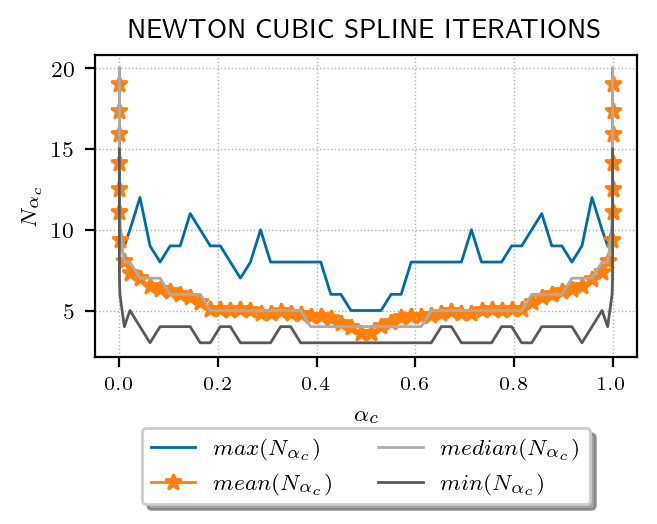

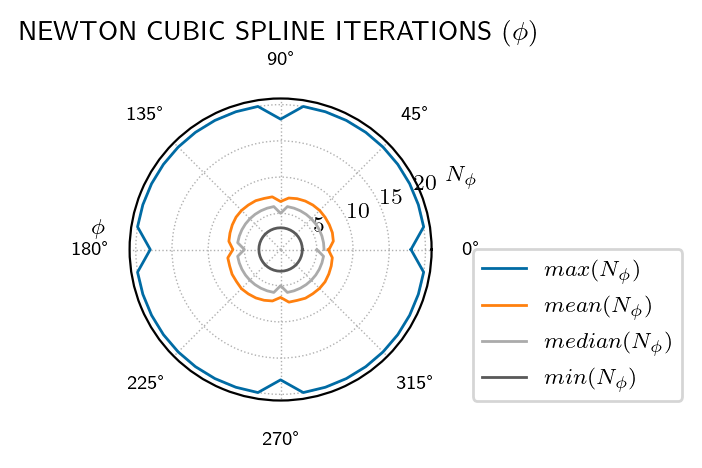

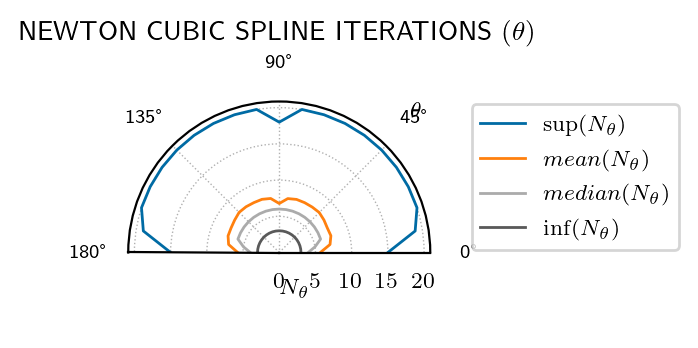

In [25]:
testName = "%s_TEST_POSITIONING.ENDO_DODECAHEDRON_NEWTON_CUBIC_SPLINE" % TEST_TYPE
newtonDataEndoDodecahedron = pd.read_csv("%s/%s.csv" % (DATA_DIR,testName), comment='#', index_col=[0,1,2])
plot_iterations(newtonDataEndoDodecahedron, testName, "NEWTON CUBIC SPLINE")

## 5.2 Endo-dodecahedron: Consecutive Cubic Spline 

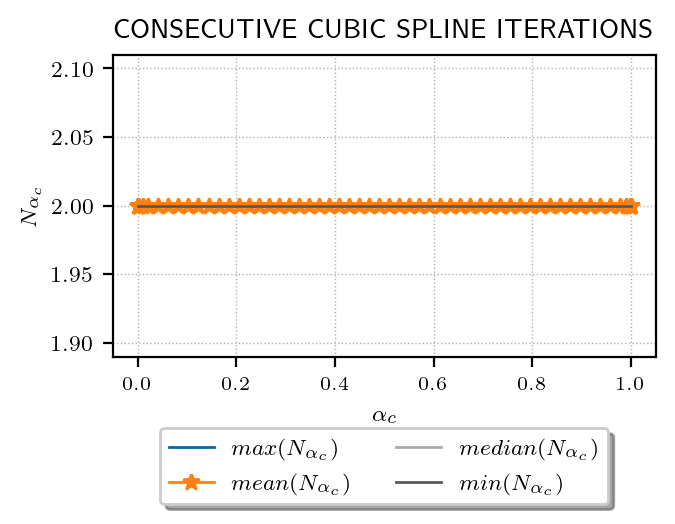

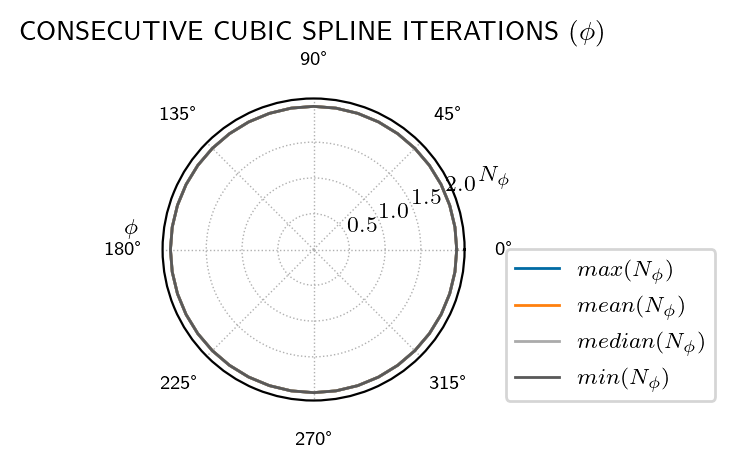

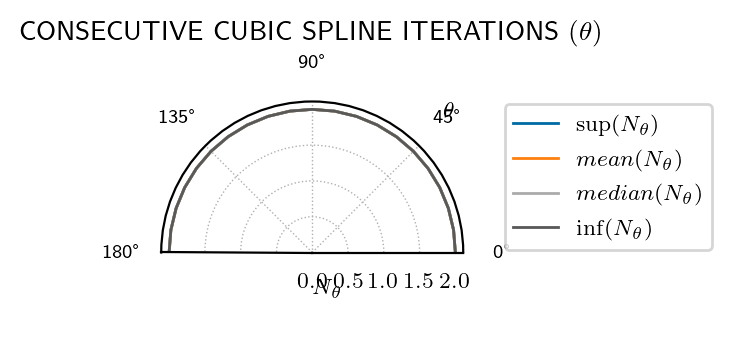

In [26]:
testName = "%s_TEST_POSITIONING.ENDO_DODECAHEDRON_CONSECUTIVE_CUBIC_SPLINE" % TEST_TYPE
cubicDataEndoDodecahedron = pd.read_csv("%s/%s.csv" % (DATA_DIR,testName), comment='#', index_col=[0,1,2])
plot_iterations(cubicDataEndoDodecahedron, testName, "CONSECUTIVE CUBIC SPLINE")

## 5.3 Endo-dodecahedron: Method comparison 
**Iterations**

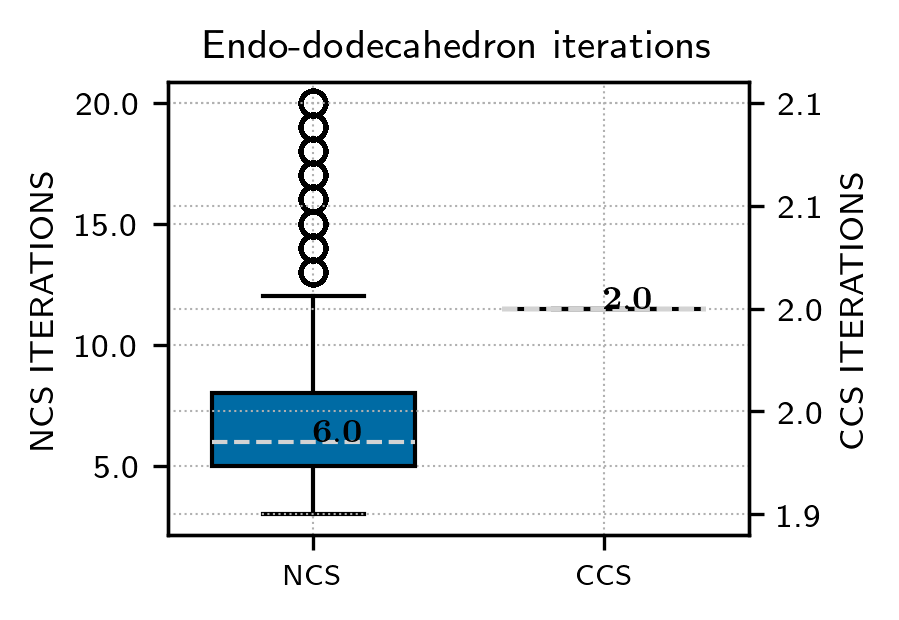

In [27]:
plot_iteration_boxplots(cubicDataEndoDodecahedron, newtonDataEndoDodecahedron, 'Endo-dodecahedron')

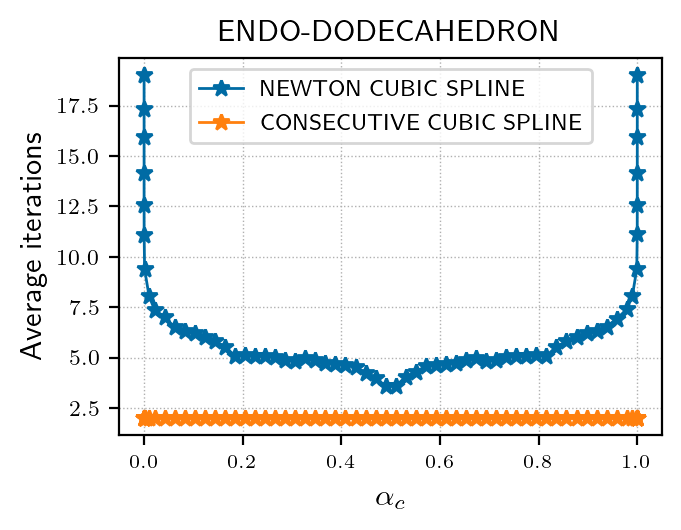

In [28]:
set_iteration_fig_properties()
newtonAlphaItMean = newtonDataEndoDodecahedron.groupby('ALPHA_STAR').ITERATIONS.mean()
cubicAlphaItMean = cubicDataEndoDodecahedron.groupby('ALPHA_STAR').ITERATIONS.mean()
plt.plot(newtonAlphaItMean.index, newtonAlphaItMean, marker='*', label="NEWTON CUBIC SPLINE")
plt.plot(cubicAlphaItMean.index, cubicAlphaItMean, marker='*', label="CONSECUTIVE CUBIC SPLINE")
plt.xlabel(r"$\alpha_c$", fontsize=11)
plt.title("ENDO-DODECAHEDRON",fontsize=11)
plt.ylabel("Average iterations",fontsize=11)
plt.legend()
plt.savefig(os.path.join(figPathName,"COMPARISON_NCS_CCS_ENDO_DODECAHEDRON_ITERATIONS.pdf"),
            bbox_inches='tight')

**CPU Time** 

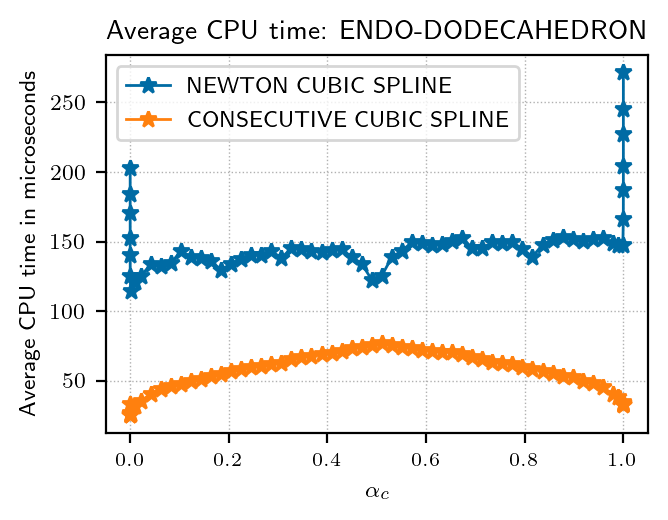

In [29]:
newtonCpuTimeAlphaMean = newtonDataEndoDodecahedron.groupby('ALPHA_STAR').CPU_TIME_NANOSECONDS.mean() / 1000.
cubicCpuTimeAlphaMean = cubicDataEndoDodecahedron.groupby('ALPHA_STAR').CPU_TIME_NANOSECONDS.mean() / 1000.
plt.plot(newtonCpuTimeAlphaMean.index, newtonCpuTimeAlphaMean, marker="*", label="NEWTON CUBIC SPLINE")
plt.plot(cubicCpuTimeAlphaMean.index, cubicCpuTimeAlphaMean, marker="*", label="CONSECUTIVE CUBIC SPLINE")
plt.xlabel(r"$\alpha_c$")
plt.title("Average CPU time: ENDO-DODECAHEDRON")
plt.ylabel("Average CPU time in microseconds")
plt.legend()
plt.savefig(os.path.join(figPathName,"COMPARISON_NCS_CCS_ENDO_DODECAHEDRON_CPU_TIME.pdf"),
            bbox_inches='tight')